# Compare outcomes from differential analysis based on different imputation methods

- load scores based on `10_1_ald_diff_analysis`

In [1]:
import logging
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from IPython.display import display

import pimmslearn
import pimmslearn.databases.diseases

logger = pimmslearn.logging.setup_nb_logger()

plt.rcParams['figure.figsize'] = (2, 2)
fontsize = 5
pimmslearn.plotting.make_large_descriptors(fontsize)
logging.getLogger('fontTools').setLevel(logging.ERROR)

# catch passed parameters
args = None
args = dict(globals()).keys()

## Parameters
Default and set parameters for the notebook.

In [2]:
folder_experiment = 'runs/appl_ald_data/plasma/proteinGroups'

target = 'kleiner'
model_key = 'VAE'
baseline = 'RSN'
out_folder = 'diff_analysis'
selected_statistics = ['p-unc', '-Log10 pvalue', 'qvalue', 'rejected']

disease_ontology = 5082  # code from https://disease-ontology.org/
# split diseases notebook? Query gene names for proteins in file from uniprot?
annotaitons_gene_col = 'PG.Genes'

In [3]:
# Parameters
disease_ontology = 10652
folder_experiment = "runs/alzheimer_study"
target = "AD"
baseline = "PI"
model_key = "QRILC"
out_folder = "diff_analysis"
annotaitons_gene_col = "None"


Add set parameters to configuration

In [4]:
params = pimmslearn.nb.get_params(args, globals=globals())
args = pimmslearn.nb.Config()
args.folder_experiment = Path(params["folder_experiment"])
args = pimmslearn.nb.add_default_paths(args,
                                 out_root=(
                                     args.folder_experiment
                                     / params["out_folder"]
                                     / params["target"]
                                     / f"{params['baseline']}_vs_{params['model_key']}"))
args.update_from_dict(params)
args.scores_folder = scores_folder = (args.folder_experiment
                                      / params["out_folder"]
                                      / params["target"]
                                      / 'scores')
args.freq_features_observed = args.folder_experiment / 'freq_features_observed.csv'
args

root - INFO     Removed from global namespace: folder_experiment


root - INFO     Removed from global namespace: target


root - INFO     Removed from global namespace: model_key


root - INFO     Removed from global namespace: baseline


root - INFO     Removed from global namespace: out_folder


root - INFO     Removed from global namespace: selected_statistics


root - INFO     Removed from global namespace: disease_ontology


root - INFO     Removed from global namespace: annotaitons_gene_col


root - INFO     Already set attribute: folder_experiment has value runs/alzheimer_study


root - INFO     Already set attribute: out_folder has value diff_analysis


{'annotaitons_gene_col': 'None',
 'baseline': 'PI',
 'data': PosixPath('runs/alzheimer_study/data'),
 'disease_ontology': 10652,
 'folder_experiment': PosixPath('runs/alzheimer_study'),
 'freq_features_observed': PosixPath('runs/alzheimer_study/freq_features_observed.csv'),
 'model_key': 'QRILC',
 'out_figures': PosixPath('runs/alzheimer_study/figures'),
 'out_folder': PosixPath('runs/alzheimer_study/diff_analysis/AD/PI_vs_QRILC'),
 'out_metrics': PosixPath('runs/alzheimer_study'),
 'out_models': PosixPath('runs/alzheimer_study'),
 'out_preds': PosixPath('runs/alzheimer_study/preds'),
 'scores_folder': PosixPath('runs/alzheimer_study/diff_analysis/AD/scores'),
 'selected_statistics': ['p-unc', '-Log10 pvalue', 'qvalue', 'rejected'],
 'target': 'AD'}

### Excel file for exports

In [5]:
files_out = dict()
writer_args = dict(float_format='%.3f')

fname = args.out_folder / 'diff_analysis_compare_methods.xlsx'
files_out[fname.name] = fname
writer = pd.ExcelWriter(fname)
logger.info("Writing to excel file: %s", fname)

root - INFO     Writing to excel file: runs/alzheimer_study/diff_analysis/AD/PI_vs_QRILC/diff_analysis_compare_methods.xlsx


## Load scores

### Load baseline model scores
Show all statistics, later use selected statistics

In [6]:
fname = args.scores_folder / f'diff_analysis_scores_{args.baseline}.pkl'
scores_baseline = pd.read_pickle(fname)
scores_baseline

model                                      PI                        \
var                                        SS DF      F p-unc   np2   
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD         0.219  1  0.346 0.557 0.002   
                             age        0.089  1  0.140 0.709 0.001   
                             Kiel       2.179  1  3.441 0.065 0.018   
                             Magdeburg  5.671  1  8.955 0.003 0.045   
                             Sweden     8.799  1 13.895 0.000 0.068   
...                                       ... ..    ...   ...   ...   
S4R3U6                       AD         0.000  1  0.000 0.997 0.000   
                             age        0.348  1  0.329 0.567 0.002   
                             Kiel       0.158  1  0.150 0.699 0.001   
                             Magdeburg  3.100  1  2.937 0.088 0.015   
                             Sweden    13.843  1 13.117 0.000 0.064   

model                                                                 
var                                    -Log10 pvalue qvalue rejected  
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD                0.254  0.695    False  
                             age               0.150  0.811    False  
                             Kiel              1.186  0.151    False  
                             Magdeburg         2.504  0.013     True  
                             Sweden            3.594  0.002     True  
...                                              ...    ...      ...  
S4R3U6                       AD                0.001  0.998    False  
                             age               0.247  0.703    False  
                             Kiel              0.155  0.804    False  
                             Magdeburg         1.055  0.189    False  
                             Sweden            3.426  0.002     True  

[7105 rows x 8 columns]

### Load selected comparison model scores

In [7]:
fname = args.scores_folder / f'diff_analysis_scores_{args.model_key}.pkl'
scores_model = pd.read_pickle(fname)
scores_model

model                                   QRILC                        \
var                                        SS DF      F p-unc   np2   
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD         0.727  1  4.638 0.033 0.024   
                             age        0.010  1  0.063 0.802 0.000   
                             Kiel       0.409  1  2.611 0.108 0.013   
                             Magdeburg  0.924  1  5.893 0.016 0.030   
                             Sweden     2.416  1 15.415 0.000 0.075   
...                                       ... ..    ...   ...   ...   
S4R3U6                       AD         2.272  1  1.062 0.304 0.006   
                             age        6.115  1  2.859 0.093 0.015   
                             Kiel       9.560  1  4.469 0.036 0.023   
                             Magdeburg 14.887  1  6.960 0.009 0.035   
                             Sweden     2.842  1  1.329 0.251 0.007   

model                                                                 
var                                    -Log10 pvalue qvalue rejected  
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD                1.488  0.081    False  
                             age               0.096  0.875    False  
                             Kiel              0.968  0.208    False  
                             Magdeburg         1.792  0.046     True  
                             Sweden            3.919  0.001     True  
...                                              ...    ...      ...  
S4R3U6                       AD                0.517  0.453    False  
                             age               1.034  0.184    False  
                             Kiel              1.446  0.087    False  
                             Magdeburg         2.045  0.028     True  
                             Sweden            0.601  0.394    False  

[7105 rows x 8 columns]

### Combined scores
show only selected statistics for comparsion

In [8]:
scores = scores_model.join(scores_baseline, how='outer')[[args.baseline, args.model_key]]
scores = scores.loc[:, pd.IndexSlice[scores.columns.levels[0].to_list(),
                                     args.selected_statistics]]
scores

model                                     PI                                \
var                                    p-unc -Log10 pvalue qvalue rejected   
protein groups               Source                                          
A0A024QZX5;A0A087X1N8;P35237 AD        0.557         0.254  0.695    False   
                             Kiel      0.065         1.186  0.151    False   
                             Magdeburg 0.003         2.504  0.013     True   
                             Sweden    0.000         3.594  0.002     True   
                             age       0.709         0.150  0.811    False   
...                                      ...           ...    ...      ...   
S4R3U6                       AD        0.997         0.001  0.998    False   
                             Kiel      0.699         0.155  0.804    False   
                             Magdeburg 0.088         1.055  0.189    False   
                             Sweden    0.000         3.426  0.002     True   
                             age       0.567         0.247  0.703    False   

model                                  QRILC                                
var                                    p-unc -Log10 pvalue qvalue rejected  
protein groups               Source                                         
A0A024QZX5;A0A087X1N8;P35237 AD        0.033         1.488  0.081    False  
                             Kiel      0.108         0.968  0.208    False  
                             Magdeburg 0.016         1.792  0.046     True  
                             Sweden    0.000         3.919  0.001     True  
                             age       0.802         0.096  0.875    False  
...                                      ...           ...    ...      ...  
S4R3U6                       AD        0.304         0.517  0.453    False  
                             Kiel      0.036         1.446  0.087    False  
                             Magdeburg 0.009         2.045  0.028     True  
                             Sweden    0.251         0.601  0.394    False  
                             age       0.093         1.034  0.184    False  

[7105 rows x 8 columns]

Models in comparison (name mapping)

In [9]:
models = pimmslearn.nb.Config.from_dict(
    pimmslearn.pandas.index_to_dict(scores.columns.get_level_values(0)))
vars(models)

{'PI': 'PI', 'QRILC': 'QRILC'}

## Describe scores

In [10]:
scores.describe()

model        PI                             QRILC                        
var       p-unc -Log10 pvalue    qvalue     p-unc -Log10 pvalue    qvalue
count 7,105.000     7,105.000 7,105.000 7,105.000     7,105.000 7,105.000
mean      0.259         2.491     0.335     0.245         2.747     0.311
std       0.302         5.382     0.329     0.299         5.157     0.327
min       0.000         0.000     0.000     0.000         0.000     0.000
25%       0.004         0.335     0.015     0.002         0.359     0.008
50%       0.121         0.918     0.242     0.090         1.045     0.180
75%       0.462         2.421     0.616     0.438         2.711     0.584
max       1.000       149.871     1.000     1.000        86.243     1.000

### One to one comparison of by feature:

In [11]:
scores = scores.loc[pd.IndexSlice[:, args.target], :]
scores.to_excel(writer, 'scores', **writer_args)
scores

/tmp/ipykernel_49975/3761369923.py:2: FutureWarning: Starting with pandas version 3.0 all arguments of to_excel except for the argument 'excel_writer' will be keyword-only.
  scores.to_excel(writer, 'scores', **writer_args)


model                                                        PI                \
var                                                       p-unc -Log10 pvalue   
protein groups                                     Source                       
A0A024QZX5;A0A087X1N8;P35237                       AD     0.557         0.254   
A0A024R0T9;K7ER74;P02655                           AD     0.043         1.363   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD     0.137         0.864   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD     0.457         0.340   
A0A075B6H7                                         AD     0.109         0.962   
...                                                         ...           ...   
Q9Y6R7                                             AD     0.175         0.756   
Q9Y6X5                                             AD     0.136         0.867   
Q9Y6Y8;Q9Y6Y8-2                                    AD     0.083         1.079   
Q9Y6Y9                                             AD     0.664         0.178   
S4R3U6                                             AD     0.997         0.001   

model                                                                      \
var                                                       qvalue rejected   
protein groups                                     Source                   
A0A024QZX5;A0A087X1N8;P35237                       AD      0.695    False   
A0A024R0T9;K7ER74;P02655                           AD      0.108    False   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD      0.263    False   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD      0.612    False   
A0A075B6H7                                         AD      0.224    False   
...                                                          ...      ...   
Q9Y6R7                                             AD      0.315    False   
Q9Y6X5                                             AD      0.262    False   
Q9Y6Y8;Q9Y6Y8-2                                    AD      0.181    False   
Q9Y6Y9                                             AD      0.780    False   
S4R3U6                                             AD      0.998    False   

model                                                     QRILC                \
var                                                       p-unc -Log10 pvalue   
protein groups                                     Source                       
A0A024QZX5;A0A087X1N8;P35237                       AD     0.033         1.488   
A0A024R0T9;K7ER74;P02655                           AD     0.038         1.422   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD     0.337         0.473   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD     0.309         0.510   
A0A075B6H7                                         AD     0.362         0.441   
...                                                         ...           ...   
Q9Y6R7                                             AD     0.175         0.756   
Q9Y6X5                                             AD     0.069         1.161   
Q9Y6Y8;Q9Y6Y8-2                                    AD     0.083         1.079   
Q9Y6Y9                                             AD     0.831         0.081   
S4R3U6                                             AD     0.304         0.517   

model                                                                      
var                                                       qvalue rejected  
protein groups                                     Source                  
A0A024QZX5;A0A087X1N8;P35237                       AD      0.081    False  
A0A024R0T9;K7ER74;P02655                           AD      0.091    False  
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD      0.487    False  
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD      0.458    False  
A0A075B6H7                                         AD      0.511    False  
...                                        

And the descriptive statistics
of the numeric values:

In [12]:
scores.describe()

model        PI                             QRILC                        
var       p-unc -Log10 pvalue    qvalue     p-unc -Log10 pvalue    qvalue
count 1,421.000     1,421.000 1,421.000 1,421.000     1,421.000 1,421.000
mean      0.250         1.405     0.332     0.245         1.494     0.318
std       0.289         1.640     0.314     0.285         1.785     0.312
min       0.000         0.000     0.000     0.000         0.000     0.000
25%       0.012         0.360     0.040     0.010         0.364     0.030
50%       0.116         0.935     0.234     0.108         0.967     0.208
75%       0.437         1.913     0.596     0.432         2.019     0.579
max       0.999        24.249     1.000     1.000        25.264     1.000

and the boolean decision values

In [13]:
scores.describe(include=['bool', 'O'])

model,PI,QRILC
var,rejected,rejected
count,1421,1421
unique,2,2
top,False,False
freq,1032,1000


## Load frequencies of observed features

In [14]:
freq_feat = pd.read_csv(args.freq_features_observed, index_col=0)
freq_feat.columns = pd.MultiIndex.from_tuples([('data', 'frequency'),])
freq_feat

,data
,frequency
protein groups,
A0A024QZX5;A0A087X1N8;P35237,186
A0A024R0T9;K7ER74;P02655,195
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;O60462-4;O60462-5;Q7LBX6;X5D2Q8,174
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503,196
A0A075B6H7,91
...,...
Q9Y6R7,197
Q9Y6X5,173


## Compare shared features

In [15]:
scores_common = (scores
                 .dropna()
                 .reset_index(-1, drop=True)
                 ).join(
    freq_feat, how='left'
)
scores_common

PI                       \
                                                   p-unc -Log10 pvalue qvalue   
protein groups                                                                  
A0A024QZX5;A0A087X1N8;P35237                       0.557         0.254  0.695   
A0A024R0T9;K7ER74;P02655                           0.043         1.363  0.108   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... 0.137         0.864  0.263   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            0.457         0.340  0.612   
A0A075B6H7                                         0.109         0.962  0.224   
...                                                  ...           ...    ...   
Q9Y6R7                                             0.175         0.756  0.315   
Q9Y6X5                                             0.136         0.867  0.262   
Q9Y6Y8;Q9Y6Y8-2                                    0.083         1.079  0.181   
Q9Y6Y9                                             0.664         0.178  0.780   
S4R3U6                                             0.997         0.001  0.998   

                                                            QRILC  \
                                                   rejected p-unc   
protein groups                                                      
A0A024QZX5;A0A087X1N8;P35237                          False 0.033   
A0A024R0T9;K7ER74;P02655                              False 0.038   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...    False 0.337   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503               False 0.309   
A0A075B6H7                                            False 0.362   
...                                                     ...   ...   
Q9Y6R7                                                False 0.175   
Q9Y6X5                                                False 0.069   
Q9Y6Y8;Q9Y6Y8-2                                       False 0.083   
Q9Y6Y9                                                False 0.831   
S4R3U6                                                False 0.304   

                                                                         \
                                                   -Log10 pvalue qvalue   
protein groups                                                            
A0A024QZX5;A0A087X1N8;P35237                               1.488  0.081   
A0A024R0T9;K7ER74;P02655                                   1.422  0.091   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...         0.473  0.487   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503                    0.510  0.458   
A0A075B6H7                                                 0.441  0.511   
...                                                          ...    ...   
Q9Y6R7                                                     0.756  0.300   
Q9Y6X5                                                     1.161  0.146   
Q9Y6Y8;Q9Y6Y8-2                                            1.079  0.170   
Q9Y6Y9                                                     0.081  0.895   
S4R3U6                                                     0.517  0.453   

                                                                 data  
                                                   rejected frequency  
protein groups                                                         
A0A024QZX5;A0A087X1N8;P35237                          False       186  
A0A024R0T9;K7ER74;P02655                              False       195  
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...    False       174  
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503               False       196  
A0A075B6H7                                            False        91  
...                                                     ...       ...  
Q9Y6R7                                                False       197  
Q9Y6X5                                                False       173  
Q9Y6Y8;Q9Y6Y8-2                                       False       197  
Q9Y6Y9                               

### Annotate decisions in Confusion Table style:

In [16]:
def annotate_decision(scores, model, model_column):
    return scores[(model_column, 'rejected')].replace({False: f'{model} (no) ', True: f'{model} (yes)'})


annotations = None
for model, model_column in models.items():
    if annotations is not None:
        annotations += ' - '
        annotations += annotate_decision(scores_common,
                                         model=model, model_column=model_column)
    else:
        annotations = annotate_decision(
            scores_common, model=model, model_column=model_column)
annotations.name = 'Differential Analysis Comparison'
annotations.value_counts()

Differential Analysis Comparison
PI (no)  - QRILC (no)    966
PI (yes) - QRILC (yes)   355
PI (no)  - QRILC (yes)    66
PI (yes) - QRILC (no)     34
Name: count, dtype: int64

### List different decisions between models

In [17]:
mask_different = (
    (scores_common.loc[:, pd.IndexSlice[:, 'rejected']].any(axis=1))
    & ~(scores_common.loc[:, pd.IndexSlice[:, 'rejected']].all(axis=1))
)
_to_write = scores_common.loc[mask_different]
_to_write.to_excel(writer, 'differences', **writer_args)
logger.info("Writen to Excel file under sheet 'differences'.")
_to_write

/tmp/ipykernel_49975/1417621106.py:6: FutureWarning: Starting with pandas version 3.0 all arguments of to_excel except for the argument 'excel_writer' will be keyword-only.
  _to_write.to_excel(writer, 'differences', **writer_args)
root - INFO     Writen to Excel file under sheet 'differences'.


PI                       \
                                                   p-unc -Log10 pvalue qvalue   
protein groups                                                                  
A0A075B6J9                                         0.032         1.489  0.086   
A0A075B7B8                                         0.159         0.797  0.293   
A0A087WWT2;Q9NPD7                                  0.018         1.751  0.054   
A0A087X152;D6RE16;E0CX15;O95185;O95185-2           0.015         1.817  0.047   
A0A0A0MS20;A0A0A0MSZ8;A0A0G2JM38;A0A0G2JM43;A0A... 0.225         0.648  0.376   
...                                                  ...           ...    ...   
Q9P0K9                                             0.037         1.429  0.096   
Q9UJ14                                             0.022         1.648  0.065   
Q9ULP0-3;Q9ULP0-6                                  0.004         2.429  0.015   
Q9UNW1                                             0.005         2.278  0.020   
Q9UQ52                                             0.046         1.337  0.114   

                                                            QRILC  \
                                                   rejected p-unc   
protein groups                                                      
A0A075B6J9                                            False 0.009   
A0A075B7B8                                            False 0.009   
A0A087WWT2;Q9NPD7                                     False 0.008   
A0A087X152;D6RE16;E0CX15;O95185;O95185-2               True 0.056   
A0A0A0MS20;A0A0A0MSZ8;A0A0G2JM38;A0A0G2JM43;A0A...    False 0.017   
...                                                     ...   ...   
Q9P0K9                                                False 0.010   
Q9UJ14                                                False 0.018   
Q9ULP0-3;Q9ULP0-6                                      True 0.024   
Q9UNW1                                                 True 0.256   
Q9UQ52                                                False 0.004   

                                                                         \
                                                   -Log10 pvalue qvalue   
protein groups                                                            
A0A075B6J9                                                 2.060  0.028   
A0A075B7B8                                                 2.055  0.028   
A0A087WWT2;Q9NPD7                                          2.110  0.025   
A0A087X152;D6RE16;E0CX15;O95185;O95185-2                   1.253  0.123   
A0A0A0MS20;A0A0A0MSZ8;A0A0G2JM38;A0A0G2JM43;A0A...         1.780  0.047   
...                                                          ...    ...   
Q9P0K9                                                     2.007  0.030   
Q9UJ14                                                     1.748  0.050   
Q9ULP0-3;Q9ULP0-6                                          1.611  0.064   
Q9UNW1                                                     0.591  0.400   
Q9UQ52                                                     2.366  0.015   

                                                                 data  
                                                   rejected frequency  
protein groups                                                         
A0A075B6J9                                             True       156  
A0A075B7B8                                             True        57  
A0A087WWT2;Q9NPD7                                      True       193  
A0A087X152;D6RE16;E0CX15;O95185;O95185-2              False       176  
A0A0A0MS20;A0A0A0MSZ8;A0A0G2JM38;A0A0G2JM43;A0A...     True       166  
...                                                     ...       ...  
Q9P0K9                                                 True       192  
Q9UJ14                                                 True       169  
Q9ULP0-3;Q9ULP0-6                                     False       136  
Q9UNW1                               

## Plot qvalues of both models with annotated decisions

Prepare data for plotting (qvalues)

In [18]:
var = 'qvalue'
to_plot = [scores_common[v][var] for v in models.values()]
for s, k in zip(to_plot, models.keys()):
    s.name = k.replace('_', ' ')
to_plot.append(scores_common['data'])
to_plot.append(annotations)
to_plot = pd.concat(to_plot, axis=1)
to_plot

,PI,QRILC,frequency,Differential Analysis Comparison
protein groups,,,,
A0A024QZX5;A0A087X1N8;P35237,0.695,0.081,186,PI (no) - QRILC (no)
A0A024R0T9;K7ER74;P02655,0.108,0.091,195,PI (no) - QRILC (no)
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;O60462-4;O60462-5;Q7LBX6;X5D2Q8,0.263,0.487,174,PI (no) - QRILC (no)
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503,0.612,0.458,196,PI (no) - QRILC (no)
A0A075B6H7,0.224,0.511,91,PI (no) - QRILC (no)
...,...,...,...,...
Q9Y6R7,0.315,0.300,197,PI (no) - QRILC (no)
Q9Y6X5,0.262,0.146,173,PI (no) - QRILC (no)
Q9Y6Y8;Q9Y6Y8-2,0.181,0.170,197,PI (no) - QRILC (no)


List of features with the highest difference in qvalues

In [19]:
# should it be possible to run not only RSN?
to_plot['diff_qvalue'] = (to_plot[str(args.baseline)] - to_plot[str(args.model_key)]).abs()
to_plot.loc[mask_different].sort_values('diff_qvalue', ascending=False)

,PI,QRILC,frequency,Differential Analysis Comparison,diff_qvalue
protein groups,,,,,
P43004;P43004-2;P43004-3,0.768,0.036,89,PI (no) - QRILC (yes),0.732
J3KSJ8;Q9UD71;Q9UD71-2,0.681,0.006,51,PI (no) - QRILC (yes),0.675
G3V295;G3V3I1;G3V5Z7;P60900,0.553,0.043,95,PI (no) - QRILC (yes),0.511
E7EN89;E9PP67;E9PQ25;F2Z2Y8;Q9H0E2;Q9H0E2-2,0.457,0.001,86,PI (no) - QRILC (yes),0.455
Q08174-2,0.442,0.020,194,PI (no) - QRILC (yes),0.422
...,...,...,...,...,...
O75083,0.045,0.060,102,PI (yes) - QRILC (no),0.015
K7ERI9;P02654,0.042,0.052,196,PI (yes) - QRILC (no),0.010
J3KNC5;Q92832;Q92832-2,0.043,0.050,182,PI (yes) - QRILC (no),0.007


### Differences plotted with created annotations

pimmslearn.plotting - INFO     Saved Figures to runs/alzheimer_study/diff_analysis/AD/PI_vs_QRILC/diff_analysis_comparision_1_QRILC


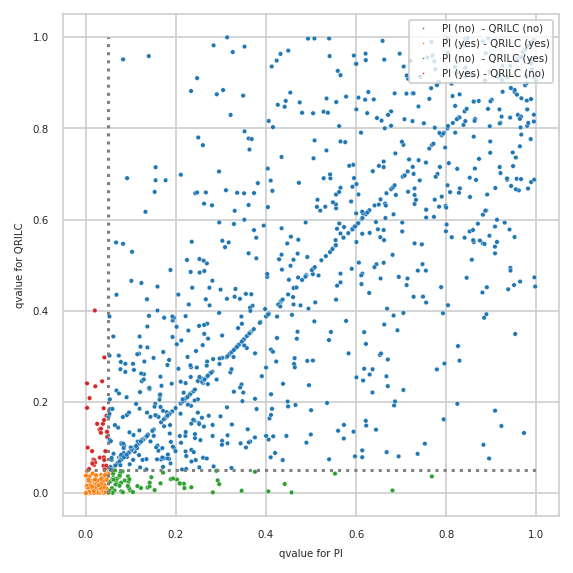

In [20]:
figsize = (4, 4)
size = 5
fig, ax = plt.subplots(figsize=figsize)
x_col = to_plot.columns[0]
y_col = to_plot.columns[1]
ax = sns.scatterplot(data=to_plot,
                     x=x_col,
                     y=y_col,
                     s=size,
                     hue='Differential Analysis Comparison',
                     ax=ax)
_ = ax.legend(fontsize=fontsize,
              title_fontsize=fontsize,
              markerscale=0.4,
              title='',
              )
ax.set_xlabel(f"qvalue for {x_col}")
ax.set_ylabel(f"qvalue for {y_col}")
ax.hlines(0.05, 0, 1, color='grey', linestyles='dotted')
ax.vlines(0.05, 0, 1, color='grey', linestyles='dotted')
sns.move_legend(ax, "upper right")
files_out[f'diff_analysis_comparision_1_{args.model_key}'] = (
    args.out_folder /
    f'diff_analysis_comparision_1_{args.model_key}')
fname = files_out[f'diff_analysis_comparision_1_{args.model_key}']
pimmslearn.savefig(fig, name=fname)

- also showing how many features were measured ("observed") by size of circle

pimmslearn.plotting - INFO     Saved Figures to runs/alzheimer_study/diff_analysis/AD/PI_vs_QRILC/diff_analysis_comparision_2_QRILC


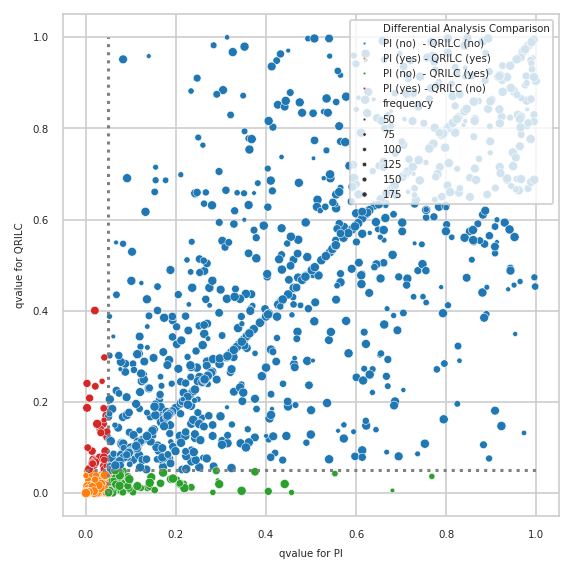

In [21]:
fig, ax = plt.subplots(figsize=figsize)
ax = sns.scatterplot(data=to_plot,
                     x=to_plot.columns[0],
                     y=to_plot.columns[1],
                     size='frequency',
                     s=size,
                     sizes=(5, 20),
                     hue='Differential Analysis Comparison')
_ = ax.legend(fontsize=fontsize,
              title_fontsize=fontsize,
              markerscale=0.6,
              title='',
              )
ax.set_xlabel(f"qvalue for {x_col}")
ax.set_ylabel(f"qvalue for {y_col}")
ax.hlines(0.05, 0, 1, color='grey', linestyles='dotted')
ax.vlines(0.05, 0, 1, color='grey', linestyles='dotted')
sns.move_legend(ax, "upper right")
files_out[f'diff_analysis_comparision_2_{args.model_key}'] = (
    args.out_folder / f'diff_analysis_comparision_2_{args.model_key}')
pimmslearn.savefig(
    fig, name=files_out[f'diff_analysis_comparision_2_{args.model_key}'])

## Only features contained in model
- this block exist due to a specific part in the ALD analysis of the paper

In [22]:
scores_model_only = scores.reset_index(level=-1, drop=True)
_diff = scores_model_only.index.difference(scores_common.index)
if not _diff.empty:
    scores_model_only = (scores_model_only
                         .loc[
                             _diff,
                             args.model_key]
                         .sort_values(by='qvalue', ascending=True)
                         .join(freq_feat.squeeze().rename(freq_feat.columns.droplevel()[0])
                               )
                         )
    display(scores_model_only)
else:
    scores_model_only = None
    logger.info("No features only in new comparision model.")

if not _diff.empty:
    scores_model_only.to_excel(writer, 'only_model', **writer_args)
    display(scores_model_only.rejected.value_counts())
    scores_model_only_rejected = scores_model_only.loc[scores_model_only.rejected]
    scores_model_only_rejected.to_excel(
        writer, 'only_model_rejected', **writer_args)

root - INFO     No features only in new comparision model.


## DISEASES DB lookup

Query diseases database for gene associations with specified disease ontology id.

In [23]:
data = pimmslearn.databases.diseases.get_disease_association(
    doid=args.disease_ontology, limit=10000)
data = pd.DataFrame.from_dict(data, orient='index').rename_axis('ENSP', axis=0)
data = data.rename(columns={'name': args.annotaitons_gene_col}).reset_index(
).set_index(args.annotaitons_gene_col)
data

pimmslearn.databases.diseases - WARNING  There are more associations available


,ENSP,score
None,,
APOE,ENSP00000252486,5.000
PSEN2,ENSP00000355747,5.000
APP,ENSP00000284981,5.000
PSEN1,ENSP00000326366,5.000
MAPT,ENSP00000340820,4.800
...,...,...
FRAT2,ENSP00000360058,0.681
CLEC4M,ENSP00000316228,0.681
DSC2,ENSP00000280904,0.681


## Shared features
ToDo: new script -> DISEASES DB lookup

In [24]:
feat_name = scores.index.names[0]  # first index level is feature name
if args.annotaitons_gene_col in scores.index.names:
    logger.info(f"Found gene annotation in scores index:  {scores.index.names}")
else:
    logger.info(f"No gene annotation in scores index:  {scores.index.names}"
                " Exiting.")
    import sys
    sys.exit(0)

root - INFO     No gene annotation in scores index:  ['protein groups', 'Source'] Exiting.


SystemExit: 0

/home/runner/work/pimms/pimms/project/.snakemake/conda/3fa5fb1d5dd2a817778dc1597a6471cf_/lib/python3.12/site-packages/IPython/core/interactiveshell.py:3585: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [ ]:
gene_to_PG = (scores.droplevel(
    list(set(scores.index.names) - {feat_name, args.annotaitons_gene_col})
)
    .index
    .to_frame()
    .reset_index(drop=True)
    .set_index(args.annotaitons_gene_col)
)
gene_to_PG.head()

In [ ]:
disease_associations_all = data.join(
    gene_to_PG).dropna().reset_index().set_index(feat_name).join(annotations)
disease_associations_all

## only by model

In [ ]:
idx = disease_associations_all.index.intersection(scores_model_only.index)
disease_assocications_new = disease_associations_all.loc[idx].sort_values(
    'score', ascending=False)
disease_assocications_new.head(20)

In [ ]:
mask = disease_assocications_new.loc[idx, 'score'] >= 2.0
disease_assocications_new.loc[idx].loc[mask]

## Only by model which were significant

In [ ]:
idx = disease_associations_all.index.intersection(
    scores_model_only_rejected.index)
disease_assocications_new_rejected = disease_associations_all.loc[idx].sort_values(
    'score', ascending=False)
disease_assocications_new_rejected.head(20)

In [ ]:
mask = disease_assocications_new_rejected.loc[idx, 'score'] >= 2.0
disease_assocications_new_rejected.loc[idx].loc[mask]

## Shared which are only significant for by model

In [ ]:
mask = (scores_common[(str(args.model_key), 'rejected')] & mask_different)
mask.sum()

In [ ]:
idx = disease_associations_all.index.intersection(mask.index[mask])
disease_assocications_shared_rejected_by_model = (disease_associations_all.loc[idx].sort_values(
    'score', ascending=False))
disease_assocications_shared_rejected_by_model.head(20)

In [ ]:
mask = disease_assocications_shared_rejected_by_model.loc[idx, 'score'] >= 2.0
disease_assocications_shared_rejected_by_model.loc[idx].loc[mask]

## Only significant by RSN

In [ ]:
mask = (scores_common[(str(args.baseline), 'rejected')] & mask_different)
mask.sum()

In [ ]:
idx = disease_associations_all.index.intersection(mask.index[mask])
disease_assocications_shared_rejected_by_RSN = (
    disease_associations_all
    .loc[idx]
    .sort_values('score', ascending=False))
disease_assocications_shared_rejected_by_RSN.head(20)

In [ ]:
mask = disease_assocications_shared_rejected_by_RSN.loc[idx, 'score'] >= 2.0
disease_assocications_shared_rejected_by_RSN.loc[idx].loc[mask]

## Write to excel

In [ ]:
disease_associations_all.to_excel(
    writer, sheet_name='disease_assoc_all', **writer_args)
disease_assocications_new.to_excel(
    writer, sheet_name='disease_assoc_new', **writer_args)
disease_assocications_new_rejected.to_excel(
    writer, sheet_name='disease_assoc_new_rejected', **writer_args)

## Outputs

In [ ]:
writer.close()
files_out